In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/DIMPU YATHISH/Desktop/folll/insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.tail()
#no missing calues and null values

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [12]:
categorical_columns = ["sex", "smoker", "region"]

In [13]:
for columns in categorical_columns:
    df[columns]=df[columns].str.strip()
    #to verify clear there are any unwanted blank spaces

Text(0.5, 1.0, 'age distribution')

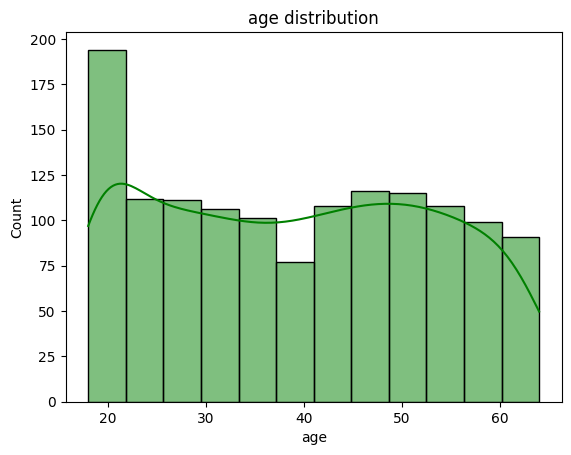

In [14]:
#age distributon
sns.histplot(df['age'], kde=True, color='green')
plt.title("age distribution")

In [15]:
#we observe the average age around is 20-27 that are youngsters

Text(0.5, 1.0, 'BMI INDEX')

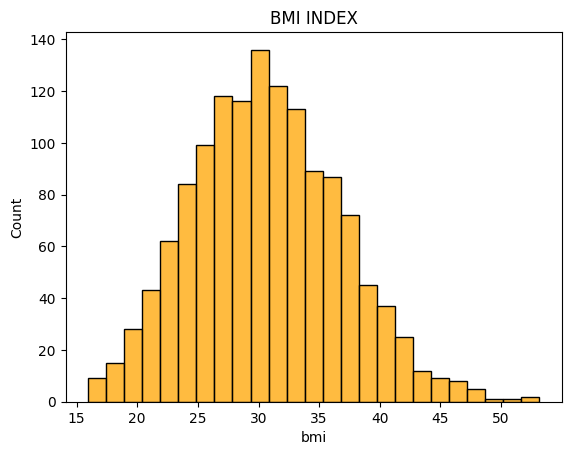

In [16]:
#BMI CHART 
sns.histplot(df["bmi"], color="orange")
plt.title("BMI INDEX")

In [17]:
#around age 30-35 we can observe BMI is high

C:\Users\DIMPU YATHISH\AppData\Local\Temp\ipykernel_8820\3733121508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='smoker', y='charges', data=df, palette=['skyblue','salmon'])
C:\Users\DIMPU YATHISH\.insomniac\conda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DIMPU YATHISH\.insomniac\conda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


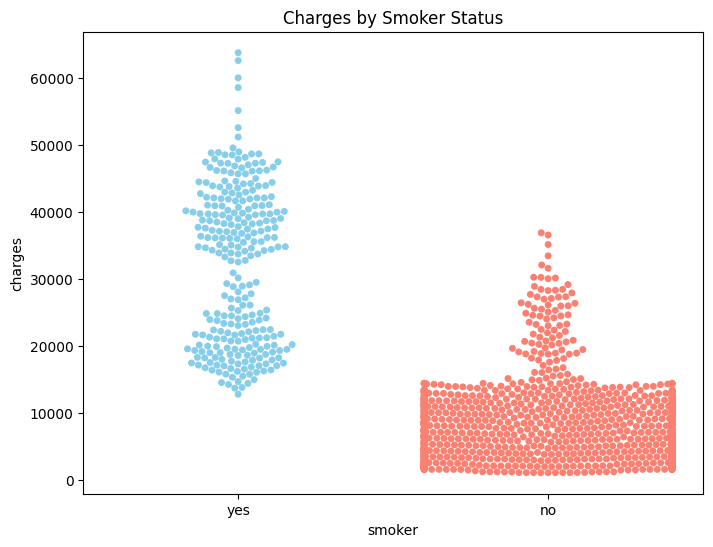

In [18]:
plt.figure(figsize=(8,6))
sns.swarmplot(x='smoker', y='charges', data=df, palette=['skyblue','salmon'])
plt.title('Charges by Smoker Status')
plt.show()

In [19]:
#swarm plot states that people who smoke are charged more comparing to ones not

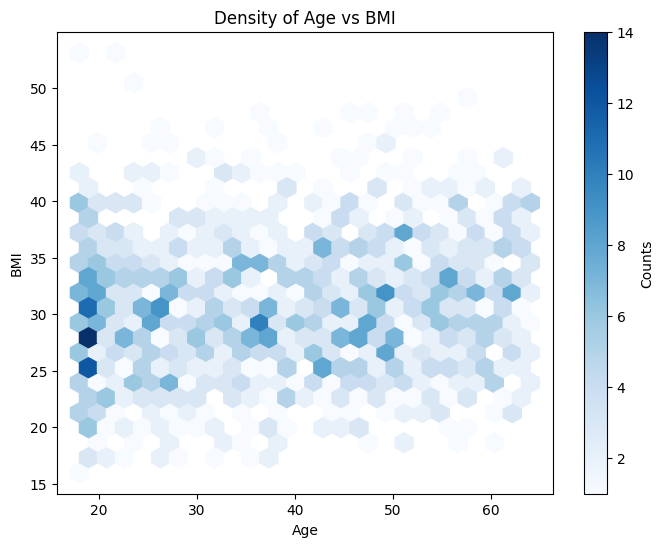

In [20]:
plt.figure(figsize=(8,6))
plt.hexbin(df['age'], df['bmi'], gridsize=25, cmap='Blues', mincnt=1)
plt.colorbar(label='Counts')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Density of Age vs BMI')
plt.show()

In [21]:
#BMI is realtively high in age between 20-35

<Axes: xlabel='age', ylabel='bmi'>

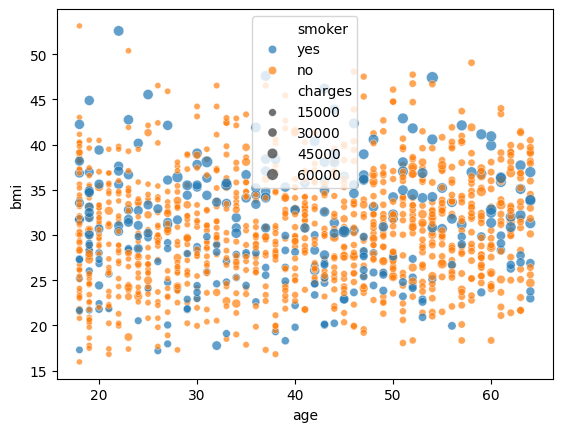

In [22]:
sns.scatterplot(x='age', y='bmi', size='charges', hue='smoker', data=df, alpha=0.7)

In [23]:
#Smokers are charged significantly more than non-smokers.
#High BMI amplifies charges when combined with smoking.
#Age has less effect on charges compared to smoking and BMI.
#Most policyholders have BMI in the 20–40 range.

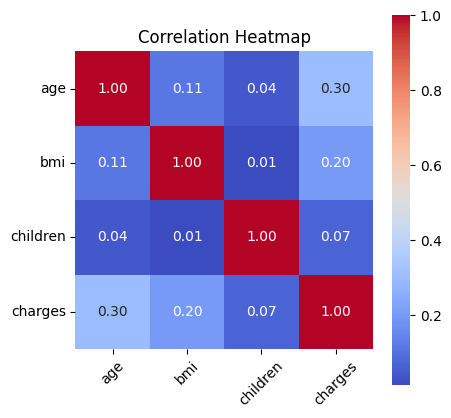

In [24]:
numeric_df = df.select_dtypes(include=[np.number])

# Check if we have at least 2 numeric columns
if numeric_df.shape[1] >= 2:
    # Compute correlation matrix
    corr = numeric_df.corr()
    
    # Set figure size based on number of columns
    plt.figure(figsize=(numeric_df.shape[1]*1.2, numeric_df.shape[1]*1.2))
    
    # Plot heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    
    # Rotate labels for better readability
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # Add title and show plot
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Not enough numeric columns to create a heatmap.")

In [25]:
#there is no correlation between children and charges (0.07) there is little correlation between BMI and charges (0.2) and age (0.3)

C:\Users\DIMPU YATHISH\AppData\Local\Temp\ipykernel_8820\1511782404.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='region', ylabel='charges'>

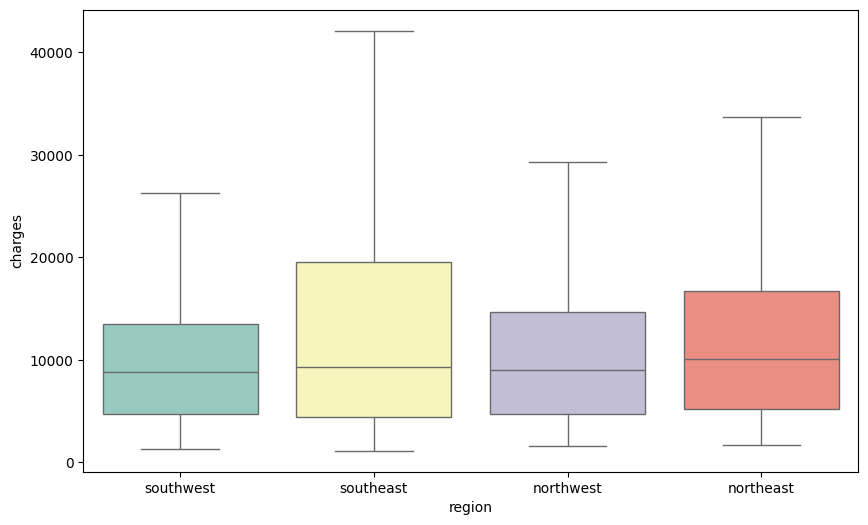

In [28]:
plt.figure(figsize=(10,6))  # Slightly wider for readability

# Create boxplot
sns.boxplot(
    x="region", 
    y="charges", 
    data=df, 
    palette="Set3", 
    showfliers=False  # hides extreme outliers for cleaner visualization
)


In [27]:
#insurance charged by region